<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/TensorFlow_Basics_from_docs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers 

Will be coding through every tutorials and gudies from the TensorFlow Documentation. The goal is to cement the basics for the upcoming developer exam and also knowing the basics very well might help in customizing tensorflow further. 


# TensorFlow Basics 
Things I will be going through: 
- Tensor 
- Variable 
- Automatic Differentiation 
- Intro to graphs and function
- Intro to modules, layers and models 
- Training loop 
- Advanced auto diff
- Ragged tensors 
- Sparse tensors 
- Numpy api 
- Tensor Slicing



## Introduction to Tensors 

In [2]:
# Creating a scalr or called an rank-0 tensors 
rank_0_tensors = tf.constant(4)
rank_0_tensors.ndim

0

In [5]:
# Creating a rank-1 tensors or otherwise called an vector 
rank_1_tensor = tf.constant([1,2,3,4])
rank_1_tensor.ndim , rank_1_tensor

(1,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>)

In [6]:
# Lets create a matrrix otherwise called as a rank 2 tensor 
rank_2_tensor = tf.constant([[1,2,3] , 
                             [4,5,6]])

rank_2_tensor.shape , rank_2_tensor.ndim

(TensorShape([2, 3]), 2)

In [11]:
# Whats the default dtype of the tensors? 
rank_2_tensor.dtype , rank_2_tensor

(tf.int32, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [10]:
# Setting the dtype while creating the tensor at first place. 
dtype_tensor = tf.constant([[1 , 2 ,3], 
                            [4, 5, 6]] , dtype = tf.float32)

dtype_tensor.dtype , dtype_tensor

(tf.float32, <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>)

Also tensors can be of more than 3 dimension, also dimensions or axes the same shit. 

In [12]:
# Constructing a rank 3 tensor 
rank_3_tensor = tf.constant([
      [[0 , 1, 2, 3, 4 ] , 
       [5, 6, 7, 8 , 9]] , 

       [[10 , 11, 12, 13, 14] , 
        [15, 16 , 17 , 18 , 19]], 

        [[20 , 21 ,22 ,23 ,24], 
         [25, 26 , 27 , 28 ,29]] ])

print(rank_3_tensor) , rank_3_tensor.ndim 


tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


(None, 3)

In [13]:
# Getting the shape of above matrix 
rank_3_tensor.shape

TensorShape([3, 2, 5])

`TensorShape([3, 2, 5])` it can be decoded into: 
- 3 set of rows 
- 2 rows in each (in one row) 
- 5 elements in each 

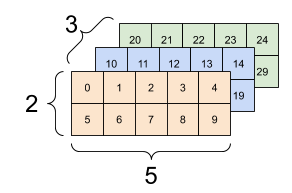

In [16]:
# Converting the tensors inot numpy array 
import numpy as np 

# First way by wrapping in np.array()
print(f'Using np.array method {np.array(rank_3_tensor)}\n')


# We can explicitly use tensor.numpy() to get the numpy version of it.
print(f'Using .numpy method {rank_3_tensor.numpy()}')

Using np.array method [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]

Using .numpy method [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]


Tensors not only comes with float, ints but also other types including: 
- complex numbers (i,j) 
- strings


The base `tf.Tensor` class requirs the tensors to be 'rectangular' --> that is, along each axis, every elemnt is the same size. 

But with the below tensors class we can handle different shapes, 
- Ragged tensors 
- Sparse tensors 


We can't do operations across tensors with different shapes. 



In [18]:
# Tensors in other kinds of operations than simple arithmetic 

c = tf.constant([
  [4.0 ,5.0] , [10.0 , 1.0] ])


# Find the largest value 
print(tf.reduce_max(c))

# Find the index of the largest value 
print(tf.argmax(c))

# Compute the softmax 
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


### About shapes 

This is very crucial when we are dealing with tensors. In machine learning most of the error arises due to shape mismatch. Knowing your input and output shapes is vital. 

Lets look into some tensor vocabulary: 

- **Shape** --> The length (number of elemnts) of each of the axes of a tensor. 
- **Rank** --> Number of tensor axes. A scalar has a rank 0, a vector has rank 1 and matrix is rank 2. 
- **Axis** or **Dimensions**: A particular dimension of a tensor. 
- **Size** : The total number of items in the tensor, the product shape vector. 


Lets create a huge shaped tensor and access every parts of it. 

In [20]:
# Creating rank 4 tensor 
rank_4_tensor = tf.zeros(shape = [3,2,4,5])
rank_4_tensor , rank_4_tensor.shape

(<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
 array([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]], dtype=float32)>, TensorShape([3, 2, 4, 5]))

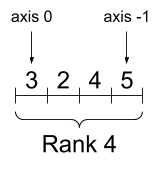

In [21]:
# Printing out the every details of our tensor 

print(f'Type of every element in the tensor: {rank_4_tensor.dtype}\n')
print(f'Number of axes: {rank_4_tensor.ndim}\n')
print(f'Shape of a tensor: {rank_4_tensor.shape}\n')
print(f'Element along axis 0 of a tensor: {rank_4_tensor.shape[0]}\n')
print(f'Element along the last axis of tensor: {rank_4_tensor.shape[-1]}\n')
print(f'Total number of elements (3*2*4*5): {tf.size(rank_4_tensor).numpy()}')

Type of every element in the tensor: <dtype: 'float32'>

Number of axes: 4

Shape of a tensor: (3, 2, 4, 5)

Element along axis 0 of a tensor: 3

Element along the last axis of tensor: 5

Total number of elements (3*2*4*5): 120


Often the axes will be of following order from global to local: 
- Batch axis (None for the most of the time) 
- Spatial dimensions [height, width] for image (224 , 224). 
- Features, the number of outputs. 

### Indexing 

#### **Single-axis Indexing**
TensorFlow follows the standard Python indexing rules, 
- Index starts at 0. 
- Negative indices count backwards from the end. 
- colons (:) are used for slices. `start:stop:step`

In [26]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [28]:
rank_1_tensor[0].numpy() , rank_1_tensor[-1].numpy() , rank_1_tensor[1].numpy()

(0, 34, 1)

In [29]:
# Indexing with a slice operator : 

print(f'Getting everything: {rank_1_tensor[:].numpy()}')
print(f'Before 4th indices: {rank_1_tensor[:4].numpy()}')
print(f'From 4 to the end: {rank_1_tensor[4:].numpy()}')
print(f'From 2, before 7: {rank_1_tensor[2:7].numpy()}')
print(f'Every other item: {rank_1_tensor[::2].numpy()}') # start stop step(2)
print(f'Reversed tensor: {rank_1_tensor[::-1].numpy()}')

Getting everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4th indices: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed tensor: [34 21 13  8  5  3  2  1  1  0]


#### **Multi-axis indexing** 

High rank tensors (3+) are indexed by passing multiple indices. 


In [30]:
print(rank_2_tensor.numpy())

[[1 2 3]
 [4 5 6]]


In [33]:
# Passing an integer for each index, the result is a scalar (one value)

rank_2_tensor[1 , 1].numpy()

5

Indexing using many combinations of integers and slices..

In [34]:
# Get row and column of tensors 

print(f'Second row: {rank_2_tensor[1 , :].numpy()}')
print(f'Second column: {rank_2_tensor[: , 1].numpy()}')
print(f'Last row : {rank_2_tensor[-1 , :].numpy()}')
print(f'First item in last column: {rank_2_tensor[0 , -1].numpy()}\n')
print(f'Skip the first row: {rank_2_tensor[1: , :].numpy()}')

Second row: [4 5 6]
Second column: [2 5]
Last row : [4 5 6]
First item in last column: 3

Skip the first row: [[4 5 6]]


In [37]:
rank_3_tensor , rank_3_tensor.shape

(<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
 array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],
 
        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],
 
        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]], dtype=int32)>, TensorShape([3, 2, 5]))

Selecting the last feature across all locations in example in the batch. 

https://tensorflow.org/guide/tensor_slicing

In [40]:
# For the 3 axis tensor 
rank_3_tensor[: , : , -1] # here we get both the rows and cols, at the end indexing into the 4th index

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 4,  9],
       [14, 19],
       [24, 29]], dtype=int32)>

### Manipulating Shapes 

When we call shape, it returns a `TensorShape` object that shows the size along each axis. 

In [41]:
rank_2_tensor.shape

TensorShape([2, 3])

In [43]:
# Getting the Tensorshape as a python list 
rank_3_tensor.shape.as_list()

[3, 2, 5]

Like wise we can reshape a tensor into a new shape, by calling `tf.reshape` where the underlying data wont be duplicated. 

In [48]:
# Shape takes a list as an argument 
print(f'Actual shape: {rank_1_tensor.shape}')
reshaped_tensor = tf.reshape(rank_1_tensor , shape = [1, 10] ) # adding an extra dim
print(f'\nAfter reshaping: {reshaped_tensor}')

Actual shape: (10,)

After reshaping: [[ 0  1  1  2  3  5  8 13 21 34]]


In [49]:
rank_2_tensor.shape

TensorShape([2, 3])

In [52]:
tf.reshape(rank_2_tensor , shape = [1, 3, 2]) # possibilities are [2,3,1] , [1 ,2 ,3] 

<tf.Tensor: shape=(1, 3, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4],
        [5, 6]]], dtype=int32)>

In [55]:
tf.size(rank_2_tensor).numpy()

6

The important to remember is we can play with shapes till it is inbound to the actual values, in our case it is `6`. 

And if we try to exceed the size for instance adding an extra dim that will collapse the entire actual tensor. As long it is equal to 30, things will be fine. 

In [57]:
# Tryna exceed the size 6 
# tf.reshape(rank_2_tensor , shape = [2 , 2 , 2])


# Uncomment to re-produce the error 

InvalidArgumentError: ignored

Perfect! Like I said before, the tensor values exceeded above 6 and we got the error. 

```
InvalidArgumentError: Input to reshape is a tensor with 6 values, but the requested shape has 8 [Op:Reshape]
```

The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.


Also if we are not sure about the reshaping size, then we can use the [-1] which will reshape the actual tensor to whatever it fits. 

Basically it will flatten out the tensor

In [58]:
# Using -1 (Basically it will flatten out the tensor)
tf.reshape(rank_3_tensor , shape = [-1])

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)>

In [66]:
# Mixing the inner shapes to reproduce a new one 
print(tf.reshape(rank_3_tensor , [3*2 , 5]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32)


Reshaping will work for any new shape with the same total number of elements, but it will not do anything useful if you dont respect the order of the axes. 

In [69]:
# Below are the bad examples 

# Can't reorder axes with reshape 
print(tf.reshape(rank_3_tensor , shape = [2 , 3 ,5])) # Not a good practice 

# This is a mess lol 
print(tf.reshape(rank_3_tensor , shape = [5, 6]))


# This doesnt work as we exceeded the amount of values in a tensor 
try: 
  tf.reshape(rank_3_tensor , shape = [7 , -1])
except Exception as e:
  print(f'{type(e).__name__}: {e}')

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32)
InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


### Broadcasting 

Under certain conditions, smaller tensors are stretched automatically to fit larger tensors when running combined operations on them. 

This will come in handy when **we attempt to multiply or add a tensor to a scalar**. 

In that case, the scalar is broadcast to be the same shape as the other argument. 

In [70]:
x = tf.constant([[ 1, 2, 3]])
y = tf.constant(2)
z = tf.constant([2,2,2])

# Broadcasting on the fly 
print(tf.multiply(x ,2))
print(x * y)

tf.Tensor([[2 4 6]], shape=(1, 3), dtype=int32)
tf.Tensor([[2 4 6]], shape=(1, 3), dtype=int32)


Likewise, axes with the length 1 (ndim) can be stretched out to match the other arguments. Both arguments can be stretched into the same computation. 

In that case a 3x1 matrix is element-wise multiplied by a **1x4 matrix to produce a 3x4 matrix**. 

`3x1 | 1x4` we get 3x4

In [72]:
x = tf.reshape(x , [3,1]) 
print(x.shape)
y = tf.range(1,5)

print(tf.multiply(x , y))

(3, 1)
tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [73]:
# Doing the same operation without broadcasting 
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [74]:
print(tf.broadcast_to(x , y))

tf.Tensor(
[[[[1 1 1 1]
   [2 2 2 2]
   [3 3 3 3]]

  [[1 1 1 1]
   [2 2 2 2]
   [3 3 3 3]]]], shape=(1, 2, 3, 4), dtype=int32)


[To know more about broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

### `tf.convert_to_tensor()`

We use the `convert_to_tensor` on non-tensor arguments. There is registery of conversions, and most object classes like Numpys `ndarray`, `TensorShape`, Python lists and `tf.Variable` will all convert automatically. 

Also we can use `tf.register_tensor_conversion_function` if we have our own type of dtype to convert into a tensor. 

### Ragged Tensors 

A tensor with variable numbers of elements along some axis is called **ragged**. In that case `tf.ragged.RaggedTensor` for ragged data. 


Below isnt a ragged tensor, 
`[4 , None]`

In [75]:
ragged_list = [
  [0 ,1 , 2 ,3], 
  [4,5] ,
  [6,7,8], 
  [9]
]

In [76]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f'{type(e).__name__}: {e}')

ValueError: Can't convert non-rectangular Python sequence to Tensor.
